In [1]:
import numpy as np
from nd2reader import ND2Reader
import matplotlib.pyplot as plt
import math
import skimage.io
import pdb
from scipy import fftpack
from myImageLib import dirrec
import trackpy as tp
import os
import time
from IPython.display import clear_output, display
"""
Routine image preprocess
    - Bandpass filter (implemented, but does not perform exactly the same as 
        the ImageJ FFT bandpass command. See ImageJ source code at 
        https://imagej.nih.gov/ij/plugins/fft-filter.html)
"""
def to8bit(img16):
    # if img16.dtype != 'uint16':
        # raise ValueError('16-bit grayscale image is expected')
    max = img16.max()
    min = img16.min()
    img8 = np.floor_divide(img16 - min , (max - min + 1) / 256)
    return img8.astype('uint8')    
def bpass(img8, low, high):
    def gen_filter(img, low, high):
        filt = np.zeros(img.shape)
        h, w = img.shape
        center = [int(w/2), int(h/2)]
        Y, X = np.ogrid[:h, :w]        
        dist = ((X - center[0])**2 + (Y-center[1])**2)**.5        
        filt[(dist>low)&(dist<=high)] = 1
        return filt
    filt = gen_filter(img8, low, high)
    filt = fftpack.ifftshift(filt)
    im_fft = fftpack.fft2(img8)
    im_fft_filt = im_fft * filt
    im_new = fftpack.ifft2(im_fft_filt).real
    im_new = im_new - im_new.min()
    im_new = np.floor_divide(im_new, (im_new.max()+1)/256)
    return im_new.astype('uint8')

In [2]:
nd2Dir = '/home/zhengyang/data/DE/10262021/00.nd2'
with ND2Reader(nd2Dir) as images:
    img = images[0]

In [12]:
img8 = (img - img.min()) / (img.max() - img.min()) * 256

Frame([[135, 132, 126, ..., 134, 113, 111],
       [140, 138, 135, ..., 122, 117, 109],
       [134, 129, 138, ..., 124, 114, 104],
       ...,
       [ 61,  65,  73, ..., 186, 169, 182],
       [ 65,  77,  75, ..., 184, 178, 183],
       [ 77,  73,  81, ..., 188, 181, 179]], dtype=uint8)
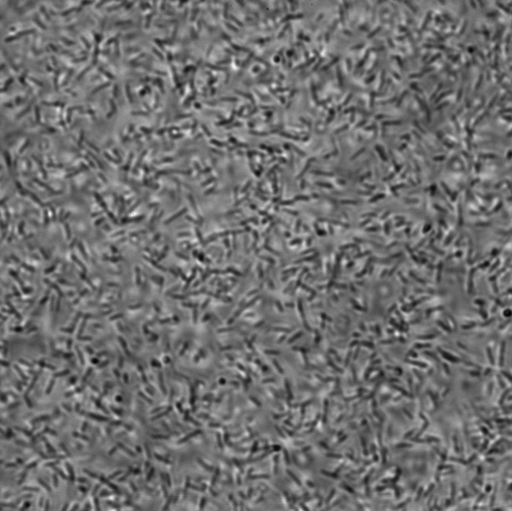

In [13]:
img8.astype('uint8')

In [ ]:
img8